# Programming Assignment
## MLP

## Importing Libraries

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os  
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset preparation

### Dataset Preprocessing

In [10]:
df = pd.read_csv('./assets/H1.csv').dropna().reset_index().drop("index", axis=1)
df_test = pd.read_csv('./assets/H2.csv').dropna().reset_index().drop("index", axis=1)
_df = df.copy()
_df_test = df_test.copy()

### Shuffling The Dataset

In [11]:
df = df.sample(frac=1).reset_index(drop=True)
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,33,2015,October,41,8,0,3,2,1,...,A,A,3,No Deposit,0,Transient-Party,67.50,0,0,Check-Out
1,0,0,2017,January,1,6,0,2,2,0,...,A,D,1,No Deposit,0,Transient,44.00,0,0,Check-Out
2,1,241,2016,September,36,2,2,5,2,0,...,D,D,0,No Deposit,0,Transient,90.00,0,0,Canceled
3,0,3,2017,March,12,19,2,1,2,0,...,D,D,0,No Deposit,0,Transient,85.33,1,3,Check-Out
4,0,21,2016,March,13,21,1,2,2,0,...,A,A,0,No Deposit,0,Transient,48.00,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,226,2016,July,27,2,2,5,3,0,...,D,D,1,No Deposit,0,Transient,103.77,0,1,Check-Out
39592,0,1,2015,August,31,1,0,1,2,0,...,D,D,0,No Deposit,0,Transient,211.00,0,2,Check-Out
39593,0,225,2016,June,26,23,1,3,2,0,...,A,A,0,No Deposit,0,Transient-Party,72.00,0,2,Check-Out
39594,0,2,2016,March,13,20,2,1,2,0,...,A,A,0,No Deposit,0,Transient,88.00,1,0,Check-Out


### Categorical & Numerical Features

In [12]:
print(f'columns name=\n\t{df.columns}')
print(f'Numeric columns=\n\t{df._get_numeric_data().columns}')
print(f'categorical columns=\n\t{df.select_dtypes(include=["object"]).columns}')

columns name=
	Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'DaysInWaitingList', 'CustomerType',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus'],
      dtype='object')
Numeric columns=
	Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 

In [13]:
categorical_cols = df.select_dtypes(include=["object"]).columns

# Approach 1:
dict_ = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].apply(lambda x: dict_[x])

# Approach 2:
for i in categorical_cols:
    df[i] = pd.Categorical(df[i])
    df[i] = df[i].cat.codes
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,33,2015,9,41,8,0,3,2,1,...,0,0,3,0,0,3,67.50,0,0,1
1,0,0,2017,0,1,6,0,2,2,0,...,0,3,1,0,0,2,44.00,0,0,1
2,1,241,2016,8,36,2,2,5,2,0,...,3,3,0,0,0,2,90.00,0,0,0
3,0,3,2017,2,12,19,2,1,2,0,...,3,3,0,0,0,2,85.33,1,3,1
4,0,21,2016,2,13,21,1,2,2,0,...,0,0,0,0,0,2,48.00,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,226,2016,6,27,2,2,5,3,0,...,3,3,1,0,0,2,103.77,0,1,1
39592,0,1,2015,7,31,1,0,1,2,0,...,3,3,0,0,0,2,211.00,0,2,1
39593,0,225,2016,5,26,23,1,3,2,0,...,0,0,0,0,0,3,72.00,0,2,1
39594,0,2,2016,2,13,20,2,1,2,0,...,0,0,0,0,0,2,88.00,1,0,1


In [14]:
df_test.columns.to_list() == df.columns.to_list()

True

In [15]:
dict_ = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_test['ArrivalDateMonth'] = df_test['ArrivalDateMonth'].apply(lambda x: dict_[x])

categorical_idx = {}
for i in categorical_cols:
    categorical_idx[i] = pd.CategoricalIndex(_df[i]).categories.to_list()
categorical_idx.pop('ArrivalDateMonth')

for i in list(categorical_idx.keys()):
    df_test[i] = df_test[i].map(lambda x: categorical_idx[i].index(x) if list(categorical_idx[i]).count(x)>0 else -1)
df_test

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,6,2015,7,27,1,0,2,1,0.0,...,0,0,0,0,0,2,0.00,0,0,1
1,1,88,2015,7,27,1,0,4,2,0.0,...,0,0,0,0,0,2,76.50,0,1,0
2,1,65,2015,7,27,1,0,4,1,0.0,...,0,0,0,0,0,2,68.00,0,1,0
3,1,92,2015,7,27,1,2,4,2,0.0,...,0,0,0,0,0,2,76.50,0,2,0
4,1,100,2015,7,27,2,0,2,2,0.0,...,0,0,0,0,0,2,76.50,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79297,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,0,0,0,2,96.14,0,0,1
79298,0,102,2017,8,35,31,2,5,3,0.0,...,4,4,0,0,0,2,225.43,0,2,1
79299,0,34,2017,8,35,31,2,5,2,0.0,...,3,3,0,0,0,2,157.71,0,4,1
79300,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,0,2,104.40,0,0,1


### Normalizing Dataset

In [16]:
# normalizing

scaler = preprocessing.MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
scaled_df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.044776,0.0,0.818182,0.769231,0.233333,0.0000,0.075,0.036364,0.1,...,0.000,0.000000,0.176471,0.0,0.0,1.000000,0.143629,0.000,0.0,0.5
1,0.0,0.000000,1.0,0.000000,0.000000,0.166667,0.0000,0.050,0.036364,0.0,...,0.000,0.333333,0.058824,0.0,0.0,0.666667,0.097943,0.000,0.0,0.5
2,1.0,0.327001,0.5,0.727273,0.673077,0.033333,0.1250,0.125,0.036364,0.0,...,0.375,0.333333,0.000000,0.0,0.0,0.666667,0.187371,0.000,0.0,0.0
3,0.0,0.004071,1.0,0.181818,0.211538,0.600000,0.1250,0.025,0.036364,0.0,...,0.375,0.333333,0.000000,0.0,0.0,0.666667,0.178292,0.125,0.6,0.5
4,0.0,0.028494,0.5,0.181818,0.230769,0.666667,0.0625,0.050,0.036364,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.666667,0.105720,0.000,0.6,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0.0,0.306649,0.5,0.545455,0.500000,0.033333,0.1250,0.125,0.054545,0.0,...,0.375,0.333333,0.058824,0.0,0.0,0.666667,0.214141,0.000,0.2,0.5
39592,0.0,0.001357,0.0,0.636364,0.576923,0.000000,0.0000,0.025,0.036364,0.0,...,0.375,0.333333,0.000000,0.0,0.0,0.666667,0.422606,0.000,0.4,0.5
39593,0.0,0.305292,0.5,0.454545,0.480769,0.733333,0.0625,0.075,0.036364,0.0,...,0.000,0.000000,0.000000,0.0,0.0,1.000000,0.152378,0.000,0.4,0.5
39594,0.0,0.002714,0.5,0.181818,0.230769,0.633333,0.1250,0.025,0.036364,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.666667,0.183483,0.125,0.0,0.5


### Split Dataset to Train and Validation

In [17]:
# Split to train & validation
df_train = scaled_df.sample(frac=0.8).reset_index(drop=True)
df_valid = scaled_df.drop(index=df_train.index).reset_index(drop=True)
# df_train = df.sample(frac=0.8).reset_index(drop=True)
# df_valid = df.drop(index=df_train.index).reset_index(drop=True)

print(f"dataset shape:\n{df.shape}\n{type(df)}\n")
print(f"train shape:\n{df_train.shape}\n{type(df_train)}\n")
print(f"test shape:\n{df_valid.shape}\n{type(df_valid)}")
df_train

dataset shape:
(39596, 28)
<class 'pandas.core.frame.DataFrame'>

train shape:
(31677, 28)
<class 'pandas.core.frame.DataFrame'>

test shape:
(7919, 28)
<class 'pandas.core.frame.DataFrame'>


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.092266,1.0,0.272727,0.269231,0.333333,0.000,0.025,0.036364,0.0,...,0.375,0.333333,0.000000,0.0,0.0,0.666667,0.132937,0.0,0.0,0.5
1,0.0,0.033921,0.5,0.272727,0.288462,0.366667,0.000,0.025,0.018182,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.666667,0.121272,0.0,0.0,0.5
2,0.0,0.000000,0.5,0.909091,0.884615,0.533333,0.000,0.025,0.036364,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.666667,0.129049,0.0,0.0,0.5
3,0.0,0.000000,0.5,0.545455,0.596154,1.000000,0.125,0.000,0.018182,0.0,...,0.625,0.555556,0.058824,0.0,0.0,0.666667,0.443019,0.0,0.0,0.5
4,0.0,0.173677,0.0,0.818182,0.769231,0.233333,0.250,0.200,0.036364,0.0,...,0.500,0.444444,0.117647,0.0,0.0,0.666667,0.133850,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31672,0.0,0.021710,0.0,0.636364,0.596154,0.033333,0.125,0.125,0.054545,0.0,...,0.625,0.666667,0.000000,0.0,0.0,0.666667,0.378786,0.0,0.2,0.5
31673,0.0,0.018996,1.0,0.181818,0.192308,0.500000,0.000,0.025,0.054545,0.1,...,0.875,0.777778,0.000000,0.0,0.0,0.666667,0.235973,0.0,0.2,0.5
31674,0.0,0.067843,0.5,0.909091,0.865385,0.366667,0.125,0.025,0.036364,0.0,...,0.000,0.000000,0.000000,0.0,0.0,0.666667,0.138380,0.0,0.4,0.5
31675,1.0,0.085482,0.5,0.727273,0.730769,0.733333,0.000,0.050,0.036364,0.0,...,0.500,0.444444,0.000000,0.0,0.0,0.666667,0.282632,0.0,0.2,0.0


In [18]:
y_train = df_train['ADR']
x_train = df_train.drop(columns='ADR')

y_val = df_valid['ADR']
x_val = df_valid.drop(columns='ADR')

df_test_ADR = df_test['ADR']
df_test = df_test.drop(columns='ADR')

## Building The Multilayer perceptron

### Model Building

In [19]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, activation = 'relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(20, activation = 'relu'))
#     model.add(tf.keras.layers.Dense(20, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


In [20]:
# Run your function to get the model

model = get_model(x_train.iloc[0].shape)
x_train.iloc[0].shape

(27,)

### Compile The Model

In [21]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse','mae'])


    

In [22]:
# Run your function to compile the model

compile_model(model)

### Train The Model

In [23]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels, epoch):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(x = scaled_train_images, y = train_labels, batch_size = 64, epochs = epoch)
    return history


In [24]:
# Run your function to train the model
print("Train with 30 epochs:")
history30 = train_model(model, x_train, y_train, 30)
print("\n\nTrain with 50 epochs:")
history50 = train_model(model, x_train, y_train, 50)
print("\n\nTrain with 100 epochs:")
history100 = train_model(model, x_train, y_train, 100)

Train with 30 epochs:
Epoch 1/30
495/495 [==============================] - 1s 787us/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0702
Epoch 2/30
495/495 [==============================] - 0s 787us/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0502
Epoch 3/30
495/495 [==============================] - 0s 779us/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0439
Epoch 4/30
495/495 [==============================] - 0s 779us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0416
Epoch 5/30
495/495 [==============================] - 0s 777us/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0398
Epoch 6/30
495/495 [==============================] - 0s 791us/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0386
Epoch 7/30
495/495 [==============================] - 0s 804us/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0372
Epoch 8/30
495/495 [==============================] - 0s 806us/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0364
Epoch 9/30
495/495 [==============================] - 0s 802us/step - loss: 0.0028 - mse: 

Epoch 44/50
495/495 [==============================] - 0s 785us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0281
Epoch 45/50
495/495 [==============================] - 0s 808us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0280
Epoch 46/50
495/495 [==============================] - 0s 816us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0280
Epoch 47/50
495/495 [==============================] - 0s 798us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0281
Epoch 48/50
495/495 [==============================] - 0s 787us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0278
Epoch 49/50
495/495 [==============================] - 0s 802us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0278
Epoch 50/50
495/495 [==============================] - 0s 840us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0279


Train with 100 epochs:
Epoch 1/100
495/495 [==============================] - 0s 808us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0278
Epoch 2/100
495/495 [==============================] - 0s 796us/step - loss: 0.

### Ploting

In [25]:
# Run this cell to load the model history into a pandas DataFrame

frame1 = pd.DataFrame(history30.history)
frame2 = pd.DataFrame(history50.history)
frame2 = pd.DataFrame(history100.history)

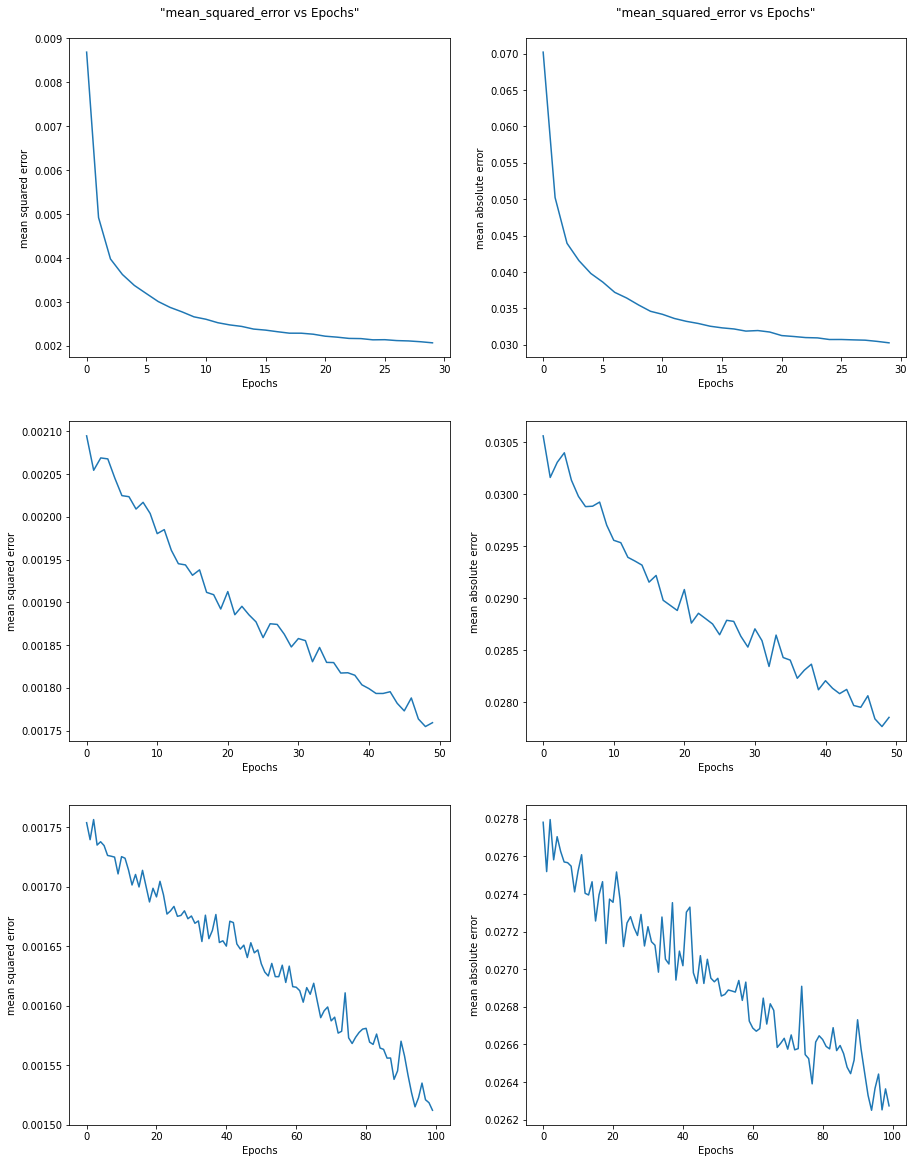

In [26]:
# Run this cell to make the Accuracy vs Epochs plot

fig, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.subplot(321)
plt.plot(history30.history['mse'])
plt.gca().set_title('"mean_squared_error vs Epochs"\n')
plt.xlabel("Epochs")
plt.ylabel("mean squared error")

plt.subplot(322)
plt.plot(history30.history['mae'])
plt.gca().set_title('"mean_squared_error vs Epochs"\n')
plt.xlabel("Epochs")
plt.ylabel("mean absolute error")

plt.subplot(323)
plt.plot(history50.history['mse'])
plt.xlabel("Epochs")
plt.ylabel("mean squared error")

plt.subplot(324)
plt.plot(history50.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("mean absolute error")

plt.subplot(325)
plt.plot(history100.history['mse'])
plt.xlabel("Epochs")
plt.ylabel("mean squared error")

plt.subplot(326)
plt.plot(history100.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("mean absolute error")

plt.show()

### Model Evaluation

In [27]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_acc, *is_anything_else_being_returned = model.evaluate(scaled_test_images, test_labels)
    return test_loss
  

In [28]:
# Run your function to evaluate the model

test_loss = evaluate_model(model, x_val, y_val)
print(f"Test loss: {test_loss}")

248/248 [==============================] - 0s 688us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0259
Test loss: 0.0014937043888494372


## Model Prediction

In [29]:
ADR_predicted = model.predict(df_test)
ADR_predicted = ADR_predicted.reshape(ADR_predicted.shape[0])
ADR_predicted.shape

2479/2479 [==============================] - 2s 582us/step


(79302,)

In [30]:
# Run your function to evaluate the model

test_loss_prime = evaluate_model(model, df_test, ADR_predicted)
print(f"Test loss: {test_loss_prime}")

2479/2479 [==============================] - 2s 802us/step - loss: 5.3607e-10 - mse: 5.3600e-10 - mae: 1.5436e-05
Test loss: 5.360724086855839e-10


In [31]:
cost = (ADR_predicted - df_test_ADR)
cost

0        255.571365
1        252.010681
2        243.176941
3        252.037750
4        256.993439
            ...    
79297    183.634536
79298    117.655632
79299    138.029777
79300    237.819666
79301    179.406323
Name: ADR, Length: 79302, dtype: float64

In [32]:
sum(cost)

16299403.59143644

### feature selection

In [33]:
cor = df.corr()
cor_target = abs(cor["ADR"])

In [34]:
cor

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
IsCanceled,1.000000,0.226453,0.043207,0.023943,0.020394,-0.009686,0.076345,0.076766,0.077193,0.080713,...,0.025101,-0.111636,-0.115909,0.271480,-0.036766,0.006212,0.107251,-0.243983,-0.103126,-0.930121
LeadTime,0.226453,1.000000,0.059064,0.126462,0.120928,-0.024238,0.322805,0.386579,0.130572,-0.001442,...,-0.010515,-0.105658,0.074782,0.191487,0.089114,0.004815,0.024702,-0.151289,-0.009889,-0.234039
ArrivalDateYear,0.043207,0.059064,1.000000,-0.525674,-0.537018,0.004171,0.019945,0.014098,-0.023502,0.057516,...,0.070255,0.031574,0.036639,-0.064105,-0.038716,0.011480,0.128427,-0.009972,0.064472,-0.041246
ArrivalDateMonth,0.023943,0.126462,-0.525674,1.000000,0.995322,-0.014427,0.050459,0.050997,0.053690,0.016983,...,0.015666,-0.012749,0.009998,-0.027255,0.059887,-0.027128,0.160063,0.005377,0.046502,-0.025788
ArrivalDateWeekNumber,0.020394,0.120928,-0.537018,0.995322,1.000000,0.076436,0.046729,0.044518,0.051728,0.016254,...,0.015049,-0.011773,0.009609,-0.024393,0.062916,-0.026221,0.156537,0.007061,0.044102,-0.022319
ArrivalDateDayOfMonth,-0.009686,-0.024238,0.004171,-0.014427,0.076436,1.000000,-0.042562,-0.050928,-0.002379,0.017349,...,0.015931,0.015576,0.005101,0.018015,0.033108,0.002736,0.040428,0.012816,0.011818,0.010765
StaysInWeekendNights,0.076345,0.322805,0.019945,0.050459,0.046729,-0.042562,1.000000,0.712535,0.096120,0.037642,...,0.122417,0.004378,0.054844,-0.026671,-0.008991,-0.204351,0.099249,-0.091773,0.059325,-0.081498
StaysInWeekNights,0.076766,0.386579,0.014098,0.050997,0.044518,-0.050928,0.712535,1.000000,0.093225,0.032816,...,0.121791,0.000331,0.083981,-0.028016,0.029505,-0.204789,0.116096,-0.103550,0.054488,-0.084763
Adults,0.077193,0.130572,-0.023502,0.053690,0.051728,-0.002379,0.096120,0.093225,1.000000,0.071239,...,0.164850,0.096834,-0.012793,0.000385,-0.012223,-0.085549,0.196789,0.014523,0.075673,-0.080241
Children,0.080713,-0.001442,0.057516,0.016983,0.016254,0.017349,0.037642,0.032816,0.071239,1.000000,...,0.373839,0.311044,0.043584,-0.059160,-0.020745,-0.028603,0.355889,0.047685,0.028082,-0.076774


<AxesSubplot:>

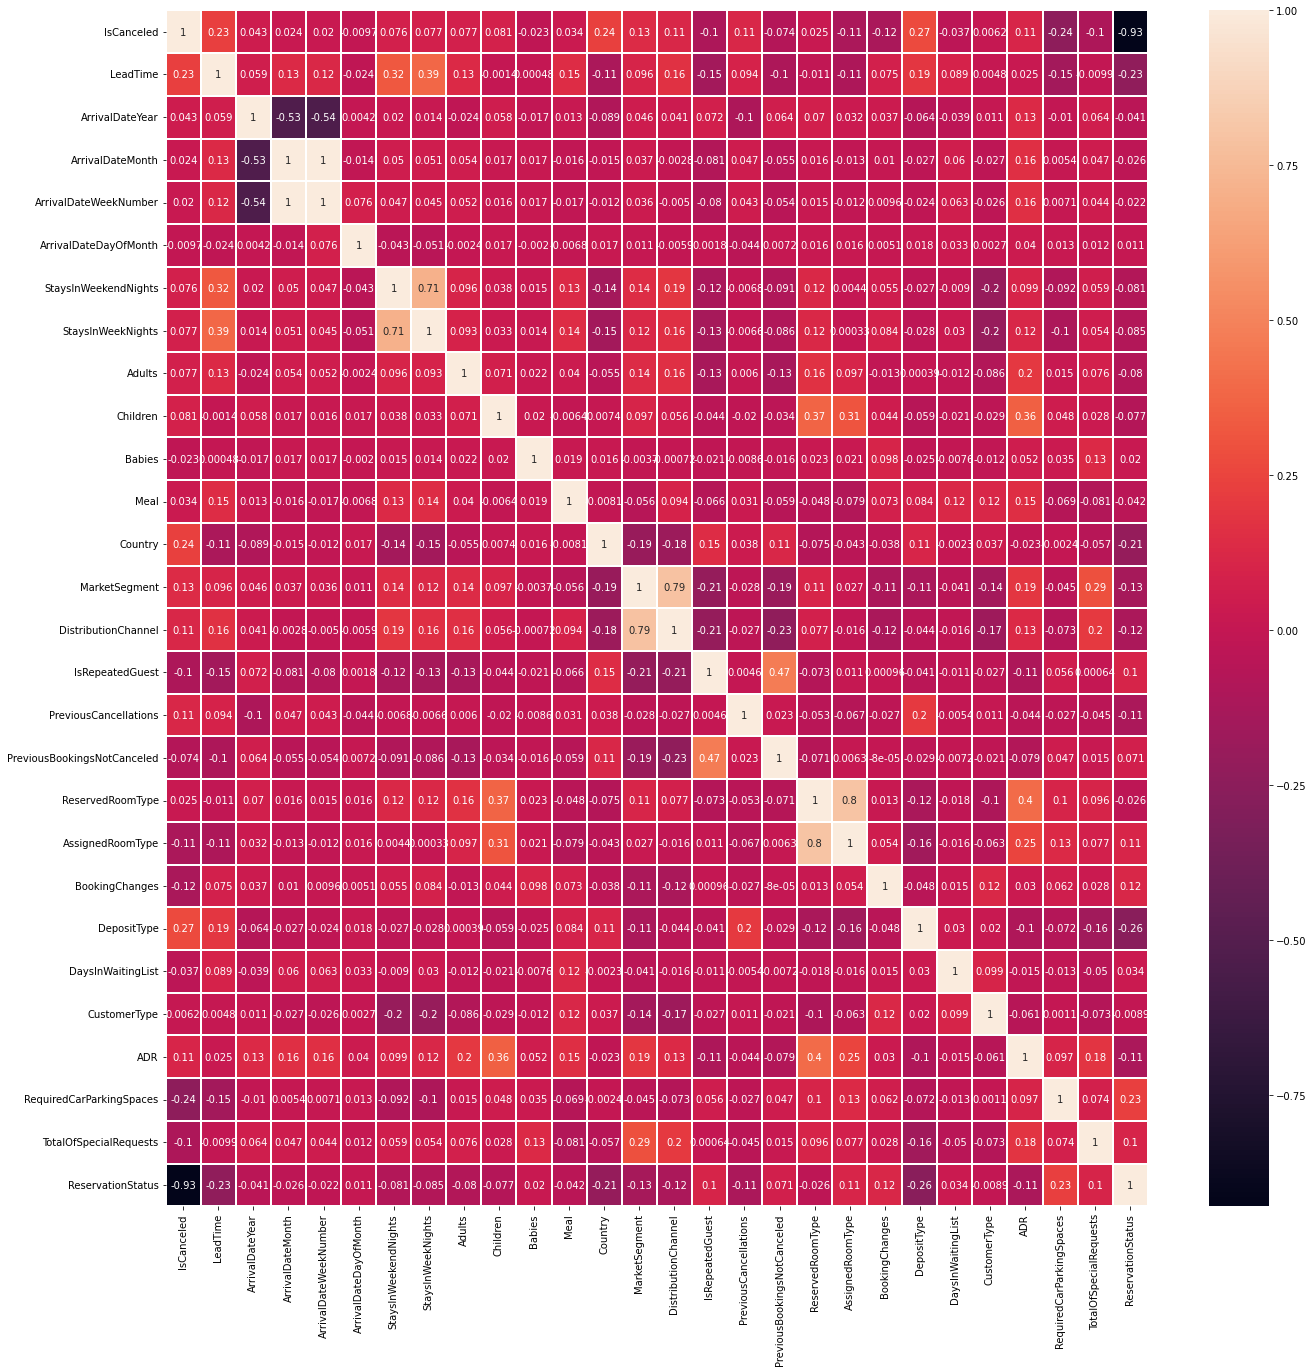

In [60]:
_fig, _ax = plt.subplots(1, 1, figsize=(22,22))
sb.heatmap(cor, annot=True, xticklabels=cor.columns.values, yticklabels=cor.columns.values, linewidth=.4, ax=_ax)

In [36]:
cor_target

IsCanceled                     0.107251
LeadTime                       0.024702
ArrivalDateYear                0.128427
ArrivalDateMonth               0.160063
ArrivalDateWeekNumber          0.156537
ArrivalDateDayOfMonth          0.040428
StaysInWeekendNights           0.099249
StaysInWeekNights              0.116096
Adults                         0.196789
Children                       0.355889
Babies                         0.052100
Meal                           0.153128
Country                        0.023039
MarketSegment                  0.192227
DistributionChannel            0.127905
IsRepeatedGuest                0.108203
PreviousCancellations          0.043757
PreviousBookingsNotCanceled    0.079112
ReservedRoomType               0.401236
AssignedRoomType               0.251119
BookingChanges                 0.029567
DepositType                    0.099722
DaysInWaitingList              0.014718
CustomerType                   0.061287
ADR                            1.000000


In [37]:
relevant_features = cor_target[cor_target > 0.1]
relevant_features.index

Index(['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'StaysInWeekNights', 'Adults', 'Children',
       'Meal', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest',
       'ReservedRoomType', 'AssignedRoomType', 'ADR', 'TotalOfSpecialRequests',
       'ReservationStatus'],
      dtype='object')

### Train with selected features

In [38]:
df_train_sf = df_train[relevant_features.index]
df_val_sf = df_valid[relevant_features.index]
df_train_sf

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,StaysInWeekNights,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,ADR,TotalOfSpecialRequests,ReservationStatus
0,0.0,1.0,0.272727,0.269231,0.025,0.036364,0.0,0.0,0.8,0.666667,0.0,0.375,0.333333,0.132937,0.0,0.5
1,0.0,0.5,0.272727,0.288462,0.025,0.018182,0.0,0.0,1.0,0.666667,0.0,0.000,0.000000,0.121272,0.0,0.5
2,0.0,0.5,0.909091,0.884615,0.025,0.036364,0.0,0.0,0.4,0.333333,0.0,0.000,0.000000,0.129049,0.0,0.5
3,0.0,0.5,0.545455,0.596154,0.000,0.018182,0.0,0.0,0.4,0.333333,0.0,0.625,0.555556,0.443019,0.0,0.5
4,0.0,0.0,0.818182,0.769231,0.200,0.036364,0.0,0.0,0.8,0.666667,0.0,0.500,0.444444,0.133850,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31672,0.0,0.0,0.636364,0.596154,0.125,0.054545,0.0,0.0,1.0,0.666667,0.0,0.625,0.666667,0.378786,0.2,0.5
31673,0.0,1.0,0.181818,0.192308,0.025,0.054545,0.1,0.0,1.0,0.666667,0.0,0.875,0.777778,0.235973,0.2,0.5
31674,0.0,0.5,0.909091,0.865385,0.025,0.036364,0.0,0.5,1.0,0.666667,0.0,0.000,0.000000,0.138380,0.4,0.5
31675,1.0,0.5,0.727273,0.730769,0.050,0.036364,0.0,0.0,1.0,0.666667,0.0,0.500,0.444444,0.282632,0.2,0.0


In [39]:
x_train_sf = df_train_sf.drop(columns='ADR')
y_train_sf = df_train_sf['ADR']

x_val_sf = df_val_sf.drop(columns='ADR')
y_val_sf = df_val_sf['ADR']

In [40]:
x_val_sf

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,StaysInWeekNights,Adults,Children,Meal,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,TotalOfSpecialRequests,ReservationStatus
0,0.0,0.5,0.090909,0.096154,0.500,0.036364,0.0,1.0,0.8,0.666667,0.0,0.000,0.444444,0.0,0.5
1,0.0,0.5,0.454545,0.500000,0.025,0.018182,0.0,0.0,0.4,0.333333,1.0,0.000,0.000000,0.0,0.5
2,1.0,1.0,0.363636,0.346154,0.075,0.036364,0.0,0.0,1.0,0.666667,0.0,0.375,0.333333,0.0,0.0
3,1.0,1.0,0.181818,0.211538,0.175,0.036364,0.0,0.5,0.6,0.666667,0.0,0.375,0.333333,0.0,0.0
4,1.0,1.0,0.636364,0.653846,0.100,0.036364,0.0,0.0,1.0,0.666667,1.0,0.000,0.000000,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,0.0,0.5,0.545455,0.500000,0.125,0.054545,0.0,0.0,0.8,0.666667,0.0,0.375,0.333333,0.2,0.5
7915,0.0,0.0,0.636364,0.576923,0.025,0.036364,0.0,0.0,1.0,0.666667,0.0,0.375,0.333333,0.4,0.5
7916,0.0,0.5,0.454545,0.480769,0.075,0.036364,0.0,0.0,1.0,0.666667,0.0,0.000,0.000000,0.4,0.5
7917,0.0,0.5,0.181818,0.230769,0.025,0.036364,0.0,0.0,1.0,0.666667,0.0,0.000,0.000000,0.0,0.5


In [41]:
model_sf = get_model(x_train_sf.iloc[0].shape)
compile_model(model_sf)
history = train_model(model_sf, x_train_sf, y_train_sf, 30)
test_loss_sf = evaluate_model(model_sf, x_val_sf, y_val_sf)
print(f"Test loss: {test_loss_sf}")

Epoch 1/30
495/495 [==============================] - 1s 789us/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0754
Epoch 2/30
495/495 [==============================] - 0s 783us/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0533
Epoch 3/30
495/495 [==============================] - 0s 785us/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0478
Epoch 4/30
495/495 [==============================] - 0s 785us/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0450
Epoch 5/30
495/495 [==============================] - 0s 828us/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0430
Epoch 6/30
495/495 [==============================] - 0s 813us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0415
Epoch 7/30
495/495 [==============================] - 0s 854us/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0404
Epoch 8/30
495/495 [==============================] - 0s 851us/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0396
Epoch 9/30
495/495 [==============================] - 0s 816us/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0386
E

In [42]:
relevant_features_sf = relevant_features.drop(labels='ADR')

ADR_predicted_sf = model_sf.predict(df_test[relevant_features_sf.index])
ADR_predicted_sf = ADR_predicted_sf.reshape(ADR_predicted_sf.shape[0])
ADR_predicted_sf.shape

2479/2479 [==============================] - 2s 608us/step


(79302,)

In [43]:
ADR_predicted_sf

array([192.59767, 193.58824, 191.8012 , ..., 198.59369, 197.48096,
       197.39064], dtype=float32)

In [44]:
cost_sf = (ADR_predicted_sf - df_test_ADR)
cost_sf

0        192.597672
1        117.088242
2        123.801193
3        117.151535
4        117.617111
            ...    
79297    101.262054
79298    -24.889381
79299     40.883689
79300     93.080957
79301     46.190640
Name: ADR, Length: 79302, dtype: float64

In [45]:
sum(cost_sf)

6989856.174245869

### Selected Result to csv

In [46]:
LOL = {'ADR':df_test_ADR, 'Predicted_ADR':ADR_predicted, 'Cost':cost ,
       'Feature_selected_ADR':ADR_predicted_sf, 'Feature_Selected_cost':cost_sf }
LOL = pd.DataFrame(LOL)

In [47]:
LOL

,ADR,Predicted_ADR,Cost,Feature_selected_ADR,Feature_Selected_cost
0,0.00,255.571365,255.571365,192.597672,192.597672
1,76.50,328.510681,252.010681,193.588242,117.088242
2,68.00,311.176941,243.176941,191.801193,123.801193
3,76.50,328.537750,252.037750,193.651535,117.151535
4,76.50,333.493439,256.993439,194.117111,117.617111
...,...,...,...,...,...
79297,96.14,279.774536,183.634536,197.402054,101.262054
79298,225.43,343.085632,117.655632,200.540619,-24.889381
79299,157.71,295.739777,138.029777,198.593689,40.883689
79300,104.40,342.219666,237.819666,197.480957,93.080957
